In [31]:
import json
import logging
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from collections import defaultdict

logger = logging.getLogger()
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)

class plot_accuracy_precision_recall():
    '''...'''

    def __init__(self, path_to_data, path_to_output):
        self.path_to_data = path_to_data
        self.d = { 
        'Dictionary - stemmed' : 'Dictionary - stemmed' ,
        'Dictionary - not stemmed' : 'Dictionary - not stemmed',
        'SGD tfidf': 'SGD tfidf', 
        'SGD count': 'SGD count', 
        'SGD count embedding 300 15':'SGD count embedding mean, d=300, s=15',
        'SGD tfidf embedding 300 15':'SGD tfidf embedding mean, d=300, s=15',
        'SGD count embedding sum 300 15':'SGD count embedding sum, d=300, s=15',
        'SGD tfidf embedding sum 300 15':'SGD tfidf embedding sum, d=300, s=15',
        'SGD count embedding max 300 15':'SGD count embedding max, d=300, s=15',
        'SGD tfidf embedding max 300 15':'SGD tfidf embedding max, d=300, s=15',
        'SGD count embedding 300 10':'SGD count embedding mean, d=300, s=10',
        'SGD tfidf embedding 300 10':'SGD tfidf embedding mean, d=300, s=10',
        'SGD count embedding sum 300 10':'SGD count embedding sum, d=300, s=10',
        'SGD tfidf embedding sum 300 10':'SGD tfidf embedding sum, d=300, s=10',
        'SGD count embedding max 300 10':'SGD count embedding max, d=300, s=10',
        'SGD tfidf embedding max 300 10':'SGD tfidf embedding max, d=300, s=10',
        'SGD count embedding 100 10':'SGD count embedding mean, d=100, s=10',
        'SGD tfidf embedding 100 10':'SGD tfidf embedding mean, d=100, s=10',
        'SGD count embedding sum 100 10':'SGD count embedding sum, d=100, s=10',
        'SGD tfidf embedding sum 100 10':'SGD tfidf embedding sum, d=100, s=10',
        'SGD count embedding max 100 10':'SGD count embedding max, d=100, s=10',
        'SGD tfidf embedding max 100 10':'SGD tfidf embedding max, d=100, s=10',
        'SGD count embedding 100 15':'SGD count embedding mean, d=100, s=15',
        'SGD tfidf embedding 100 15':'SGD tfidf embedding mean, d=100, s=15',
        'SGD count embedding sum 100 15':'SGD count embedding sum, d=100, s=15',
        'SGD tfidf embedding sum 100 15':'SGD tfidf embedding sum, d=100, s=15',
        'SGD count embedding max 100 15':'SGD count embedding max, d=100, s=15',
        'SGD tfidf embedding max 100 15':'SGD tfidf embedding max, d=100, s=15',
        'SVC tfidf': 'SVC tfidf', 
        'SVC count': 'SVC count', 
        'SVC count embedding 300 15':'SVC count embedding mean, d=300, s=15',
        'SVC tfidf embedding 300 15':'SVC tfidf embedding mean, d=300, s=15',
        'SVC count embedding sum 300 15':'SVC count embedding sum, d=300, s=15',
        'SVC tfidf embedding sum 300 15':'SVC tfidf embedding sum, d=300, s=15',
        'SVC count embedding max 300 15':'SVC count embedding max, d=300, s=15',
        'SVC tfidf embedding max 300 15':'SVC tfidf embedding max, d=300, s=15',
        'SVC count embedding 100 15':'SVC count embedding mean, d=100, s=15',
        'SVC tfidf embedding 100 15':'SVC tfidf embedding mean, d=100, s=15',
        'SVC count embedding sum 100 15':'SVC count embedding sum, d=100, s=15',
        'SVC tfidf embedding sum 100 15':'SVC tfidf embedding sum, d=100, s=15',
        'SVC count embedding max 100 15':'SVC count embedding max, d=100, s=15',
        'SVC tfidf embedding max 100 15':'SVC tfidf embedding max, d=100, s=15',
        'SVC count embedding 100 10':'SVC count embedding mean, d=100, s=10',
        'SVC tfidf embedding 100 10':'SVC tfidf embedding mean, d=100, s=10',
        'SVC count embedding sum 100 10':'SVC count embedding sum, d=100, s=10',
        'SVC tfidf embedding sum 100 10':'SVC tfidf embedding sum, d=100, s=10',
        'SVC count embedding max 100 10':'SVC count embedding max, d=100, s=10',
        'SVC tfidf embedding max 100 10':'SVC tfidf embedding max, d=100, s=10',
        'SVC count embedding 300 10':'SVC count embedding mean, d=300, s=10',
        'SVC tfidf embedding 300 10':'SVC tfidf embedding mean, d=300, s=10',
        'SVC count embedding sum 300 10':'SVC count embedding sum, d=300, s=10',
        'SVC tfidf embedding sum 300 10':'SVC tfidf embedding sum, d=300, s=10',
        'SVC count embedding max 300 10':'SVC count embedding max, d=300, s=10',
        'SVC tfidf embedding max 300 10':'SVC tfidf embedding max, d=300, s=10',
        'PA tfidf': 'PA tfidf', 
        'PA count': 'PA count', 
        'PA count embedding 300 15':'PA count embedding mean, d=300, s=15',
        'PA tfidf embedding 300 15':'PA tfidf embedding mean, d=300, s=15',
        'PA count embedding sum 300 15':'PA count embedding sum, d=300, s=15',
        'PA tfidf embedding sum 300 15':'PA tfidf embedding sum, d=300, s=15',
        'PA count embedding max 300 15':'PA count embedding max, d=300, s=15',
        'PA tfidf embedding max 300 15':'PA tfidf embedding max, d=300, s=15',
        'PA count embedding 100 15':'PA count embedding mean, d=100, s=15',
        'PA tfidf embedding 100 15':'PA tfidf embedding mean, d=100, s=15',
        'PA count embedding sum 100 15':'PA count embedding sum, d=100, s=15',
        'PA tfidf embedding sum 100 15':'PA tfidf embedding sum, d=100, s=15',
        'PA count embedding max 100 15':'PA count embedding max, d=100, s=15',
        'PA tfidf embedding max 100 15':'PA tfidf embedding max, d=100, s=15',
        'PA count embedding 100 10':'PA count embedding mean, d=100, s=10',
        'PA tfidf embedding 100 10':'PA tfidf embedding mean, d=100, s=10',
        'PA count embedding sum 100 10':'PA count embedding sum, d=100, s=10',
        'PA tfidf embedding sum 100 10':'PA tfidf embedding sum, d=100, s=10',
        'PA count embedding max 100 10':'PA count embedding max, d=100, s=10',
        'PA tfidf embedding max 100 10':'PA tfidf embedding max, d=100, s=10',
        'PA count embedding 300 10':'PA count embedding mean, d=300, s=10',
        'PA tfidf embedding 300 10':'PA tfidf embedding mean, d=300, s=10',
        'PA count embedding sum 300 10':'PA count embedding sum, d=300, s=10',
        'PA tfidf embedding sum 300 10':'PA tfidf embedding sum, d=300, s=10',
        'PA count embedding max 300 10':'PA count embedding max, d=300, s=10',
        'PA tfidf embedding max 300 10':'PA tfidf embedding max, d=300, s=10',
        'ET tfidf': 'ET tfidf', 
        'ET count': 'ET count', 
        'ET count embedding 100 15':'ET count embedding mean, d=100, s=15',
        'ET tifdf embedding 100 15':'ET tifdf embedding mean, d=100, s=15',
        'ET count embedding sum 100 15':'ET count embedding sum, d=100, s=15',
        'ET tifdf embedding sum 100 15':'ET tifdf embedding sum, d=100, s=15',
        'ET count embedding max 100 15':'ET count embedding max, d=100, s=15',
        'ET tifdf embedding max 100 15':'ET tifdf embedding max, d=100, s=15',
        'ET count embedding 100 10':'ET count embedding mean, d=100, s=10',
        'ET tifdf embedding 100 10':'ET tifdf embedding mean, d=100, s=10',
        'ET count embedding sum 100 10':'ET count embedding sum, d=100, s=10',
        'ET tifdf embedding sum 100 10':'ET tifdf embedding sum, d=100, s=10',
        'ET count embedding max 100 10':'ET count embedding max, d=100, s=10',
        'ET tifdf embedding max 100 10':'ET tifdf embedding max, d=100, s=10',
        'ET count embedding 300 10':'ET count embedding mean, d=300, s=10',
        'ET tifdf embedding 300 10':'ET tifdf embedding mean, d=300, s=10',
        'ET count embedding sum 300 10':'ET count embedding sum, d=300, s=10',
        'ET tifdf embedding sum 300 10':'ET tifdf embedding sum, d=300, s=10',
        'ET count embedding max 300 10':'ET count embedding max, d=300, s=10',
        'ET tifdf embedding max 300 10':'ET tifdf embedding max, d=300, s=10',
        'ET count embedding 300 15':'ET count embedding mean, d=300, s=15',
        'ET tifdf embedding 300 15':'ET tifdf embedding mean, d=300, s=15',
        'ET count embedding sum 300 15':'ET count embedding sum, d=300, s=15',
        'ET tifdf embedding sum 300 15':'ET tifdf embedding sum, d=300, s=15',
        'ET count embedding max 300 15':'ET count embedding max, d=300, s=15',
        'ET tifdf embedding max 300 15':'ET tifdf embedding max, d=300, s=15' }
        
        #self.emb = self.Vectorizer_dict()
        self.emb = self.Vectorizer_dict_()
        self.algorithm = self.Get_algorithm()
        self.path_to_output = path_to_output
        self.translator = {'hmnintrst' : 'Human interest', 'ecnmc' : 'Economic consequences', 'cnflct' : 'Conflict',
                           'attrresp' : 'Attribution of responsibility'}
  #      with open('../resources/numbers_to_topic.json') as handle:
   #            self.translator_numeric = json.loads(handle.read())
    def Vectorizer_dict(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'{v.split()[1]} embedding vectorizer'
                else:
                    outcome =  v
            except:
                outcome = f'{v.split()[1]} vectorizer'

            new_dict[v] = outcome
        return new_dict
    
    def Vectorizer_dict_(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            try:
                if v.split()[2] == 'embedding':
                    outcome = f'embedding vectorizer'
                else:
                    outcome =  v
            except:
                #outcome = f'{v.split()[1]} vectorizer'
                outcome = f'baseline vectorizer'

            new_dict[v] = outcome
        return new_dict

    def Get_algorithm(self):
        new_dict = defaultdict()
        for k, v in self.d.items():
            new_dict[v] = v.split()[0]
        return new_dict
    
    def Clean_dictionary_data(self, fname):
        
        logger.info(fname)
        with open(fname) as handle:
            dictdump =  json.loads(handle.read())

        frames = []
        precision = []
        recall = []
        f1score=[]
        accuracy=[]
        trainingsize = []

        for i in dictdump:
            for k, v in i.items():
                for keys, values in v.items():
                    frames.append(keys)
                    precision.append(values[0])
                    recall.append(values[1])
                    f1score.append(values[2])
                    accuracy.append(values[3])
                    trainingsize.append(k)
                    
        df = pd.DataFrame(list(zip(frames,precision,recall,f1score,accuracy,trainingsize)))
        df.rename(columns={0 :'frame',  1 :'precision', 2 :'recall', 3 : 'f1-score', 4 : 'accuracy', 5: 'training size'}, inplace=True)
        df.set_index('frame', inplace=True)

        return df
    
    def get_data_dictionary(self):
        
        fname =  f'{self.path_to_data}precision_recall_f1score_dictionary_stemmed_FRAMES.json'
        df1 = self.Clean_dictionary_data(fname)
        df1['classifier'] = 'Dictionary - stemmed'

        fname_notstemmed = f'{self.path_to_data}precision_recall_f1score_dictionary_not_stemmed_FRAMES.json'
        df2 =  df = self.Clean_dictionary_data(fname_notstemmed)
        df2['classifier'] = 'Dictionary - not stemmed'

        df = pd.concat([df1, df2])
        #df.rename(columns={0 :'precision',  1 :'recall', 2 :'f1-score', 3 : 'accuracy'}, inplace=True)
        df.rename(index=self.translator, inplace=True)
        df['approach'] = 'Dictionary Approach'
        return df

    def get_data_sml(self):

        fname_sml = '{}learning_rate_SML_new.csv'.format(self.path_to_data)
        
        df = pd.read_csv(fname_sml)
        df['frame'].replace(self.translator, inplace=True)
        df.set_index('frame', inplace=True)

        df = df[['algorithm','f1_weighted', 'precision_weighted',  'recall_score_weighted', 'accuracy', 'length_training_set']]
        df.rename(columns={'algorithm': 'classifier', 'f1_weighted' : 'f1-score', 'precision_weighted' : 'precision', 'recall_score_weighted' : 'recall', 'length_training_set': 'training size'}, inplace=True)
        df['approach'] = 'SML'

        return df

    def combine_datasets(self):
        df1 = self.get_data_dictionary()
        df2 = self.get_data_sml()
        df = pd.concat([df1, df2])
     #   df.drop('total', inplace=True)
        df['Frame'] = df.index
        df.reset_index(inplace=True)
        df['classifier'] = df['classifier'].map(self.d)
        df['vectorizer'] = df['classifier'].map(self.emb)
        df['algorithm'] = df['classifier'].map(self.algorithm)
        df["training size"] = pd.to_numeric(df["training size"])
        return df, df2, df1
    

In [35]:
path_to_data = '../output/frames/new/'
path_to_output ='../output/'

a = plot_accuracy_precision_recall(path_to_data, path_to_output)
df, df2, df1 = a.combine_datasets()
df['classifier'].unique()

2021-10-04 11:11:51,612 : INFO : ../output/frames/new/precision_recall_f1score_dictionary_stemmed_FRAMES.json
2021-10-04 11:11:51,620 : INFO : ../output/frames/new/precision_recall_f1score_dictionary_not_stemmed_FRAMES.json


array(['Dictionary - stemmed', 'Dictionary - not stemmed', 'SGD tfidf',
       'SGD count', 'SGD count embedding mean, d=300, s=15',
       'SGD tfidf embedding mean, d=300, s=15',
       'SGD count embedding sum, d=300, s=15',
       'SGD tfidf embedding sum, d=300, s=15',
       'SGD count embedding max, d=300, s=15',
       'SGD tfidf embedding max, d=300, s=15',
       'SGD count embedding mean, d=300, s=10',
       'SGD tfidf embedding mean, d=300, s=10',
       'SGD count embedding sum, d=300, s=10',
       'SGD tfidf embedding sum, d=300, s=10',
       'SGD count embedding max, d=300, s=10',
       'SGD tfidf embedding max, d=300, s=10',
       'SGD count embedding mean, d=100, s=10',
       'SGD tfidf embedding mean, d=100, s=10',
       'SGD count embedding sum, d=100, s=10',
       'SGD tfidf embedding sum, d=100, s=10',
       'SGD count embedding max, d=100, s=10',
       'SGD tfidf embedding max, d=100, s=10',
       'SGD count embedding mean, d=100, s=15',
       'SGD tfi

In [36]:
df.head(-100)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
0,Attribution of responsibility,0.562807,0.547085,0.545499,0.547085,10,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - stemmed,Dictionary
1,Conflict,0.473992,0.484305,0.455156,0.484305,10,Dictionary - stemmed,Dictionary Approach,Conflict,Dictionary - stemmed,Dictionary
2,Economic consequences,0.764124,0.766816,0.764890,0.766816,10,Dictionary - stemmed,Dictionary Approach,Economic consequences,Dictionary - stemmed,Dictionary
3,Human interest,0.705903,0.699552,0.702613,0.699552,10,Dictionary - stemmed,Dictionary Approach,Human interest,Dictionary - stemmed,Dictionary
4,Attribution of responsibility,0.593391,0.547085,0.527223,0.547085,20,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - stemmed,Dictionary
...,...,...,...,...,...,...,...,...,...,...,...
36383,Economic consequences,0.780162,0.744395,0.709905,0.744395,860,"ET tifdf embedding max, d=300, s=15",SML,Economic consequences,embedding vectorizer,ET
36384,Human interest,0.770193,0.793722,0.773573,0.793722,860,SGD tfidf,SML,Human interest,baseline vectorizer,SGD
36385,Human interest,0.764827,0.757848,0.761088,0.757848,860,SGD count,SML,Human interest,baseline vectorizer,SGD
36386,Human interest,0.721336,0.739910,0.729114,0.739910,860,"SGD count embedding mean, d=300, s=15",SML,Human interest,embedding vectorizer,SGD


In [10]:
df.head(-100)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame
0,Attribution of responsibility,0.562807,0.547085,0.545499,0.547085,10,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility
1,Conflict,0.473992,0.484305,0.455156,0.484305,10,Dictionary - stemmed,Dictionary Approach,Conflict
2,Economic consequences,0.764124,0.766816,0.764890,0.766816,10,Dictionary - stemmed,Dictionary Approach,Economic consequences
3,Human interest,0.705903,0.699552,0.702613,0.699552,10,Dictionary - stemmed,Dictionary Approach,Human interest
4,Attribution of responsibility,0.593391,0.547085,0.527223,0.547085,20,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility
...,...,...,...,...,...,...,...,...,...
11999,Attribution of responsibility,0.304229,0.551570,0.392156,0.551570,890,PA tfidf embedding max,SML,Attribution of responsibility
12000,Attribution of responsibility,0.543165,0.556054,0.523473,0.556054,890,ET tfidf,SML,Attribution of responsibility
12001,Attribution of responsibility,0.561234,0.569507,0.531439,0.569507,890,ET count,SML,Attribution of responsibility
12002,Attribution of responsibility,0.582345,0.587444,0.564725,0.587444,890,ET count embedding,SML,Attribution of responsibility


In [5]:
path_to_data = '../output/frames/new/'

fname_sml = '{}learning_rate_SML.csv'.format(path_to_data)
df = pd.read_csv(fname_sml)

df['algorithm'].unique()

array(['SGD tfidf', 'SGD count', 'SGD count embedding',
       'SGD tfidf embedding', 'SGD count embedding sum',
       'SGD tfidf embedding sum', 'SGD count embedding max',
       'SGD tfidf embedding max', 'SVC tfidf', 'SVC count',
       'SVC count embedding', 'SVC tfidf embedding',
       'SVC count embedding sum', 'SVC tfidf embedding sum',
       'SVC count embedding max', 'SVC tfidf embedding max', 'PA tfidf',
       'PA count', 'PA count embedding', 'PA tfidf embedding',
       'PA count embedding sum', 'PA tfidf embedding sum',
       'PA count embedding max', 'PA tfidf embedding max', 'ET tfidf',
       'ET count', 'ET count embedding', 'ET tifdf embedding',
       'ET count embedding sum', 'ET tifdf embedding sum',
       'ET count embedding max', 'ET tifdf embedding max'], dtype=object)

In [15]:
df

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame
0,Attribution of responsibility,0.562807,0.547085,0.545499,0.547085,10,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility
1,Conflict,0.473992,0.484305,0.455156,0.484305,10,Dictionary - stemmed,Dictionary Approach,Conflict
2,Economic consequences,0.764124,0.766816,0.764890,0.766816,10,Dictionary - stemmed,Dictionary Approach,Economic consequences
3,Human interest,0.705903,0.699552,0.702613,0.699552,10,Dictionary - stemmed,Dictionary Approach,Human interest
4,Attribution of responsibility,0.593391,0.547085,0.527223,0.547085,20,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility
...,...,...,...,...,...,...,...,...,...
12099,Human interest,0.741678,0.780269,0.739943,0.780269,890,ET tifdf embedding,SML,Human interest
12100,Human interest,0.685381,0.744395,0.702077,0.744395,890,ET count embedding sum,SML,Human interest
12101,Human interest,0.767310,0.793722,0.767842,0.793722,890,ET tifdf embedding sum,SML,Human interest
12102,Human interest,0.712726,0.766816,0.717186,0.766816,890,ET count embedding max,SML,Human interest


In [23]:
#cat ../output/frames/new/precision_recall_f1score_dictionary_not_stemmed_FRAMES.json
!cat ../output/frames/new/learning_rate_SML.csv

,length_training_set,frame,algorithm,accuracy,f1_weighted,f1_macro,f1_micro,recall_score_weighted,precision_weighted,recall_score_macro,precision_macro,recall_score_micro,precision_micro
0,10,attrresp,SGD tfidf,0.5201793721973094,0.5214567004794503,0.5187859231622467,0.5201793721973094,0.5201793721973094,0.5252581216706776,0.5201626016260164,0.5199485199485199,0.5201793721973094,0.5201793721973094
1,10,attrresp,SGD count,0.515695067264574,0.4914034698667509,0.5004148689014272,0.515695067264574,0.515695067264574,0.5567435650995651,0.5394715447154472,0.54912973082372,0.515695067264574,0.515695067264574
2,10,attrresp,SGD count embedding,0.4260089686098655,0.41569918817971685,0.403842940685046,0.4260089686098655,0.4260089686098655,0.4118818401329612,0.4104878048780488,0.4037587412587412,0.4260089686098655,0.4260089686098655
3,10,attrresp,SGD tfidf embedding,0.49327354260089684,0.45949390729573336,0.47075378573078785,0.49327354260089684,0.49327354260089684,0.5338239239584531,0.5200813008130

1924,160,attrresp,SGD count embedding sum,0.5739910313901345,0.5679720802659743,0.559828793450934,0.5739910313901345,0.5739910313901345,0.568663893241126,0.5614634146341464,0.5650602409638554,0.5739910313901345,0.5739910313901345
1925,160,attrresp,SGD tfidf embedding sum,0.515695067264574,0.4681815024351088,0.4818416523235801,0.515695067264574,0.515695067264574,0.5862388616586135,0.5478861788617886,0.5760981912144703,0.515695067264574,0.515695067264574
1926,160,attrresp,SGD count embedding max,0.5515695067264574,0.39215635449337727,0.3554913294797688,0.5515695067264574,0.5515695067264574,0.30422892075046754,0.5,0.2757847533632287,0.5515695067264574,0.5515695067264574
1927,160,attrresp,SGD tfidf embedding max,0.5695067264573991,0.5645499317353708,0.5675500969618616,0.5695067264573991,0.5695067264573991,0.5941012084303403,0.5826422764227642,0.5866581415174765,0.5695067264573991,0.5695067264573991
1928,160,attrresp,SVC tfidf,0.5515695067264574,0.39215635449337727,0.3554913294797688,0.5515

3928,310,ecnmc,ET tfidf,0.7309417040358744,0.6933382065591746,0.6504702194357367,0.7309417040358744,0.7309417040358744,0.761874110469815,0.6508175559380378,0.779505582137161,0.7309417040358744,0.7309417040358744
3929,310,ecnmc,ET count,0.6636771300448431,0.5917079008885978,0.5265928840329475,0.6636771300448431,0.6636771300448431,0.6749497448585124,0.562908777969019,0.6800492610837439,0.6636771300448431,0.6636771300448431
3930,310,ecnmc,ET count embedding,0.7443946188340808,0.7322101976879318,0.7044297174747123,0.7443946188340808,0.7443946188340808,0.7413254237129295,0.695869191049914,0.7378265412748171,0.7443946188340808,0.7443946188340808
3931,310,ecnmc,ET tifdf embedding,0.7488789237668162,0.7266072284739261,0.6931996855345912,0.7488789237668162,0.7488789237668162,0.7597924119514284,0.684724612736661,0.7679775280898877,0.7488789237668162,0.7488789237668162
3932,310,ecnmc,ET count embedding sum,0.7533632286995515,0.7388329070208773,0.7102733092386554,0.7533632286995515,0.7533632286995

6157,490,attrresp,SVC tfidf embedding sum,0.5426008968609866,0.3880227343831474,0.35174418604651164,0.5426008968609866,0.5426008968609866,0.30199054440679346,0.491869918699187,0.2737556561085973,0.5426008968609866,0.5426008968609866
6158,490,attrresp,SVC count embedding max,0.57847533632287,0.5034330735283651,0.480109126984127,0.57847533632287,0.57847533632287,0.5923397355643377,0.5393495934959349,0.5944943381491605,0.57847533632287,0.57847533632287
6159,490,attrresp,SVC tfidf embedding max,0.57847533632287,0.5034330735283651,0.480109126984127,0.57847533632287,0.57847533632287,0.5923397355643377,0.5393495934959349,0.5944943381491605,0.57847533632287,0.57847533632287
6160,490,attrresp,PA tfidf,0.600896860986547,0.5978238662365619,0.591398513577502,0.600896860986547,0.600896860986547,0.5976872327033146,0.5914634146341464,0.5943317122253899,0.600896860986547,0.600896860986547
6161,490,attrresp,PA count,0.5560538116591929,0.5433639949309097,0.5325541510512609,0.5560538116591929,0.556053811

8441,660,hmnintrst,ET count,0.7623318385650224,0.7040204491292783,0.5101744788428861,0.7623318385650225,0.7623318385650224,0.6957817966786576,0.5268786127167631,0.5851648351648352,0.7623318385650224,0.7623318385650224
8442,660,hmnintrst,ET count embedding,0.7892376681614349,0.7612117695881127,0.6233243486073675,0.7892376681614348,0.7892376681614349,0.7602935181410518,0.6082080924855491,0.6890909090909092,0.7892376681614349,0.7892376681614349
8443,660,hmnintrst,ET tifdf embedding,0.7713004484304933,0.7408893669998672,0.591266846361186,0.7713004484304933,0.7713004484304933,0.7345200887801785,0.5824277456647399,0.644040404040404,0.7713004484304933,0.7713004484304933
8444,660,hmnintrst,ET count embedding sum,0.7937219730941704,0.7761819827334431,0.6563253819351381,0.7937219730941703,0.7937219730941704,0.7719314206559764,0.6395375722543353,0.6974803664921466,0.7937219730941704,0.7937219730941704
8445,660,hmnintrst,ET tifdf embedding sum,0.7713004484304933,0.7334372513105539,0.57284507042253

10660,839,cnflct,SGD count embedding sum,0.5067264573991032,0.385729182832763,0.3794272414490994,0.5067264573991032,0.5067264573991032,0.48606908786280983,0.4968211813938516,0.4855311355311355,0.5067264573991032,0.5067264573991032
10661,839,cnflct,SGD tfidf embedding sum,0.5246636771300448,0.4771342232565767,0.48052918424753865,0.5246636771300448,0.5246636771300448,0.5505697048648673,0.5314662803798487,0.5496444895886237,0.5246636771300448,0.5246636771300448
10662,839,cnflct,SGD count embedding max,0.547085201793722,0.5162607182723667,0.5188729626385833,0.547085201793722,0.547085201793722,0.5720536563585891,0.5527925317881861,0.570995670995671,0.547085201793722,0.547085201793722
10663,839,cnflct,SGD tfidf embedding max,0.5112107623318386,0.34586366116219347,0.3382789317507418,0.5112107623318386,0.5112107623318386,0.26133644352389956,0.5,0.2556053811659193,0.5112107623318386,0.5112107623318386
10664,839,cnflct,SVC tfidf,0.5112107623318386,0.34586366116219347,0.3382789317507418,0.5112107

In [37]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Conflict') ].sort_values(['f1-score'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36185,Conflict,0.631724,0.627803,0.622905,0.627803,860,"SGD tfidf embedding mean, d=300, s=10",SML,Conflict,embedding vectorizer,SGD
36248,Conflict,0.623847,0.623318,0.621764,0.623318,860,"PA count embedding mean, d=300, s=10",SML,Conflict,embedding vectorizer,PA
36249,Conflict,0.605199,0.605381,0.605095,0.605381,860,"PA tfidf embedding mean, d=300, s=10",SML,Conflict,embedding vectorizer,PA
36263,Conflict,0.605436,0.605381,0.604185,0.605381,860,"ET tifdf embedding mean, d=100, s=10",SML,Conflict,embedding vectorizer,ET


In [12]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Conflict') ].sort_values(['f1-score'], ascending=False).head(4)

2021-10-04 11:06:12,044 : INFO : NumExpr defaulting to 8 threads.


,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame
11625,Conflict,0.575663,0.573991,0.573425,0.573991,860,SGD count,SML,Conflict
11643,Conflict,0.582952,0.573991,0.566991,0.573991,860,PA tfidf embedding,SML,Conflict
11635,Conflict,0.584299,0.578475,0.565526,0.578475,860,SVC tfidf embedding,SML,Conflict
11649,Conflict,0.565892,0.565022,0.564900,0.565022,860,ET count,SML,Conflict


In [39]:
pwd

'/Users/anne/repos/RPA/analysis'

In [48]:
def get_best_results(frame):
    df__ = df [ (df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values(['f1-score'], ascending=False).groupby('vectorizer').head(3)
    df__ = df__[['precision', 'recall', 'f1-score', 'classifier', 'vectorizer']]
    fname = f'../output/{frame}.csv'
    df__.to_csv(fname)
    print(f'saved file at location: {fname}')
    #print(df__)
    return df__

for i in  ['Attribution of responsibility', 'Conflict', 'Economic consequences', 'Human interest'] :
    get_best_results(i)
    
conflict = get_best_results('Conflict')
ec = get_best_results('Economic consequences')
hi = get_best_results('Human interest')

saved file at location: ../output/Attribution of responsibility.csv
saved file at location: ../output/Conflict.csv
saved file at location: ../output/Economic consequences.csv
saved file at location: ../output/Human interest.csv
saved file at location: ../output/Conflict.csv
saved file at location: ../output/Economic consequences.csv
saved file at location: ../output/Human interest.csv


In [41]:
df [ (df['training size'] == 860 ) & (df['frame'] == 'Attribution of responsibility') ].sort_values(['f1-score'], ascending=False).groupby('vectorizer').head(3)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36103,Attribution of responsibility,0.685928,0.681614,0.671404,0.681614,860,"SVC tfidf embedding sum, d=300, s=15",SML,Attribution of responsibility,embedding vectorizer,SVC
36121,Attribution of responsibility,0.687358,0.681614,0.670229,0.681614,860,"SVC tfidf embedding sum, d=300, s=10",SML,Attribution of responsibility,embedding vectorizer,SVC
36115,Attribution of responsibility,0.668519,0.663677,0.650338,0.663677,860,"SVC tfidf embedding sum, d=100, s=10",SML,Attribution of responsibility,embedding vectorizer,SVC
36072,Attribution of responsibility,0.581760,0.587444,0.577651,0.587444,860,SGD tfidf,SML,Attribution of responsibility,baseline vectorizer,SGD
36125,Attribution of responsibility,0.548802,0.556054,0.547471,0.556054,860,PA count,SML,Attribution of responsibility,baseline vectorizer,PA
36073,Attribution of responsibility,0.545841,0.547085,0.546365,0.547085,860,SGD count,SML,Attribution of responsibility,baseline vectorizer,SGD
340,Attribution of responsibility,0.561548,0.484305,0.405119,0.484305,860,Dictionary - stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - stemmed,Dictionary
696,Attribution of responsibility,0.638995,0.493274,0.391822,0.493274,860,Dictionary - not stemmed,Dictionary Approach,Attribution of responsibility,Dictionary - not stemmed,Dictionary


In [42]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Economic consequences') ].sort_values(['Frame', 'accuracy'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36312,Economic consequences,0.814974,0.811659,0.804132,0.811659,860,"SVC count embedding max, d=300, s=15",SML,Economic consequences,embedding vectorizer,SVC
36313,Economic consequences,0.814974,0.811659,0.804132,0.811659,860,"SVC tfidf embedding max, d=300, s=15",SML,Economic consequences,embedding vectorizer,SVC
36333,Economic consequences,0.812880,0.807175,0.797983,0.807175,860,PA count,SML,Economic consequences,baseline vectorizer,PA
36330,Economic consequences,0.800829,0.793722,0.782171,0.793722,860,"SVC count embedding max, d=300, s=10",SML,Economic consequences,embedding vectorizer,SVC


In [43]:
df[ ( df['training size'] == 860 ) & (df['Frame'] == 'Human interest') ].sort_values(['Frame', 'accuracy'], ascending=False).head(4)

,frame,precision,recall,f1-score,accuracy,training size,classifier,approach,Frame,vectorizer,algorithm
36476,Human interest,0.790948,0.807175,0.768083,0.807175,860,"ET count embedding mean, d=300, s=10",SML,Human interest,embedding vectorizer,ET
36471,Human interest,0.783770,0.802691,0.760695,0.802691,860,"ET tifdf embedding mean, d=100, s=10",SML,Human interest,embedding vectorizer,ET
36482,Human interest,0.779475,0.802691,0.774923,0.802691,860,"ET count embedding mean, d=300, s=15",SML,Human interest,embedding vectorizer,ET
36472,Human interest,0.772485,0.798206,0.764798,0.798206,860,"ET count embedding sum, d=100, s=10",SML,Human interest,embedding vectorizer,ET


In [44]:
from collections import Counter
import itertools

df.sort_values(['training size'])['training size'].to_list()
trainsize = df['training size'].to_list()
a = dict(Counter(trainsize))

repeat = [v for k, v in a.items()][0]

STEPS = 2

new = df['training size'].unique()[1::STEPS]
new_list = list(itertools.chain.from_iterable(itertools.repeat(x, repeat * STEPS) for x in new)) + [df['training size'].unique()[-1]] * (repeat *2)

final = []
for i, e in zip(trainsize, new_list):
    final.append(e)

df.sort_values(['training size'], inplace=True)
df['aggregate'] = final
df_ = df.groupby(['aggregate', 'frame', 'classifier', 'vectorizer']).mean()
df_.reset_index(inplace=True)

In [45]:
df [ (df['training size'] == 860 ) & (df['frame'] == 'Attribution of responsibility') ].sort_values(['f1-score'], ascending=False).groupby('vectorizer')['classifier'].head(1)

36103    SVC tfidf embedding sum, d=300, s=15
36072                               SGD tfidf
340                      Dictionary - stemmed
696                  Dictionary - not stemmed
Name: classifier, dtype: object

Attribution of responsibility
['Dictionary - not stemmed', 'Dictionary - stemmed', 'SGD tfidf', 'SVC tfidf embedding sum, d=300, s=15']


2021-10-04 12:36:23,125 : INFO : saved file: ../output/lineplot-Attribution of responsibility-top-1


Conflict
['Dictionary - not stemmed', 'Dictionary - stemmed', 'ET count', 'SGD tfidf embedding mean, d=300, s=10']


2021-10-04 12:36:23,595 : INFO : saved file: ../output/lineplot-Conflict-top-1


Economic consequences
['Dictionary - not stemmed', 'Dictionary - stemmed', 'PA count', 'SVC tfidf embedding max, d=300, s=15']


2021-10-04 12:36:24,037 : INFO : saved file: ../output/lineplot-Economic consequences-top-1


Human interest
['Dictionary - not stemmed', 'Dictionary - stemmed', 'ET count embedding mean, d=300, s=15', 'SGD tfidf']


2021-10-04 12:36:24,506 : INFO : saved file: ../output/lineplot-Human interest-top-1


<Figure size 842.4x595.44 with 0 Axes>

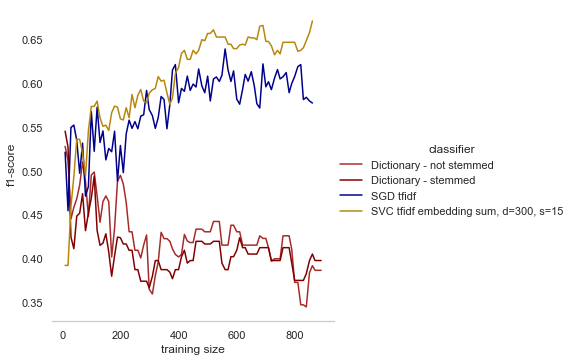

<Figure size 842.4x595.44 with 0 Axes>

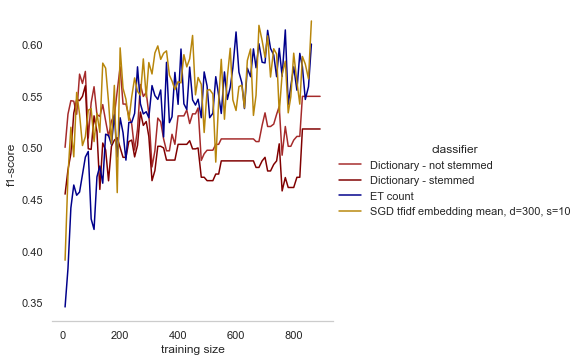

<Figure size 842.4x595.44 with 0 Axes>

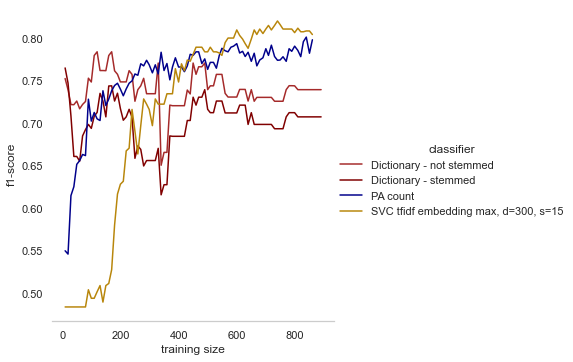

<Figure size 842.4x595.44 with 0 Axes>

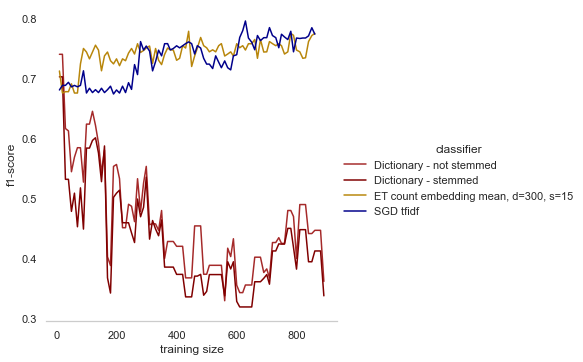

In [109]:
import seaborn
import matplotlib.pyplot as plt
from pylab import savefig
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("Set1", 8, .75)

class Make_learning_curves():
    
    def __init__(self, df, outputpath):
        self.frames = ['Attribution of responsibility', 'Conflict', 'Economic consequences', 'Human interest']
        self.df = df
        self.topN = 1
        self.outputpath = outputpath
        self.metric = 'f1-score'
        
        self.color_dict = {'Dictionary - stemmed' : 'maroon' , 
                           'Dictionary - not stemmed' : 'brown' , 
                           
                           'ET tfidf' : 'darkblue'  , 
                           'ET count' : 'darkblue'  , 
                           'ET count embedding mean, d=300, s=15' : 'darkgoldenrod' ,
                           
                           'PA count' : 'darkblue' , 
                           
                           'SGD tfidf embedding sum, d=100, s=15' : 'darkgoldenrod' , 
                          
                          
                           
                           'SGD tfidf' : 'darkblue' , 
                           'SGD tfidf embedding sum, d=300, s=10' : 'darkgoldenrod' ,
                           'SGD tfidf embedding mean, d=300, s=10' :'darkgoldenrod', 
                           
                           'SVC tfidf embedding max, d=300, s=15' : 'darkgoldenrod', 
                           'SVC tfidf embedding sum, d=300, s=15' :  'darkgoldenrod', 
                           'SVC count embedding max, d=300, s=15' :  'darkgoldenrod' }
        
    def Return_best_classifiers(self, frame):
        #return self.df[ ( self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values(['Frame', self.metric], ascending=False)['classifier'].head(self.topN).to_list()
       # print(self.df [ (self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values([self.metric], ascending=False).groupby('vectorizer')['classifier'].head(self.topN).to_list())
        return self.df [ (self.df['training size'] == 860 ) & (df['frame'] == frame) ].sort_values([self.metric], ascending=False).groupby('vectorizer')['classifier'].head(self.topN).to_list()

    
    def Return_best_of_vectorizers(self, frame):
        data = self.df[self.df['frame']==frame]
        data = data.loc[data.groupby('vectorizer')[self.metric].idxmax()]
        return data['classifier'].to_list()

    def Get_line_plot(self,frame):
        best_results = self.Return_best_classifiers(frame)
        #best_results = self.Return_best_of_vectorizers(frame)
    #    print(best_results)
        best_results = sorted(best_results)
     #   print(best_results)
        
        data = self.df[self.df["frame"]== frame]
        data = data[data['classifier'].isin(best_results)]
        #data = data[~data['classifier'].isin(['Dictionary - stemmed', 'Dictionary - not stemmed'])]
        
       # print(len(data['vectorizer'].unique() ) )
       # print(data)
    
        pal_ = [self.color_dict[i] for i in best_results ] 

        
        #pal_ = ['silver', 'dimgrey', 'black', 'grey']
        #pal_ = ['black', 'black', 'silver', 'grey']
        #pal_ = ['grey', 'black', 'silver', 'black']
        #pal = pal_[:len(data['vectorizer'].unique() )] 
       
      #  hue_order = ['embedding vectorizer', 'tfidf vectorizer', 'count vectorizer']
      #  hue_order = hue_order [:len(data['vectorizer'].unique() )] 
        hue_order = best_results
        print(hue_order)
         
        #print(classifier)
        
        plt.figure()

        fig = sns.relplot(data=data, 
                     x="training size", 
                     y=self.metric, 
                     hue='classifier', 
                     kind='line',
                    # ci="sd",
                     hue_order =hue_order, 
                  #   style = 'classifier',
                     palette=pal_,
                     markers=True, dashes=False )
                            
                     #palette=pal) 
        return fig, data
    
    def Get_figures_and_save(self):
        for frame in self.frames:
            print(frame)
            fig, data = self.Get_line_plot(frame)
            
            fig.despine(left=True)
           # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            fname = f"{self.outputpath}lineplot-{frame}-top-{self.topN}"
            #figure = fig.get_figure()
            fig.savefig(fname)
            logging.info(f'saved file: {fname}')

k = Make_learning_curves(df = df, outputpath = '../output/')
k.Get_figures_and_save()

In [72]:
set( all_c )


{'Dictionary - not stemmed',
 'Dictionary - stemmed',
 'ET tfidf',
 'SGD tfidf',
 'SGD tfidf embedding sum, d=100, s=15',
 'SGD tfidf embedding sum, d=300, s=10',
 'SVC count embedding max, d=300, s=15'}

In [75]:
pal_colors.append(color_dict[i]) for i in k.Return_best_of_vectorizers('Conflict'):


SyntaxError: invalid syntax (<ipython-input-75-669b3644c3d4>, line 1)

# Getting same classification examples

In [385]:
import eli5
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
import gensim
import embeddingvectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_pickle('../data/intermediate/RPA_data_with_dictionaryscores.pkl')
X_train , X_test, y_train, y_test = train_test_split(df['text_clean'], df['main_topic_label'], test_size = 0.2 , random_state =0)


#X_train , X_test, y_train, y_test = train_test_split(df['text_clean'], df['main_topic_label'], test_size = 0.2 , random_state =0)
#df.rename(columns= {'text_clean': 'text'}, inplace=True)
#X_train, X_test, y_train, y_test = train_test_split(df['text'], df['attrresp'], test_size=0.2, random_state=0)

In [368]:
mod = gensim.models.Word2Vec.load('/home/anne/RPA-data/output/w2v_size_300_window_10_negative_15')
MDL = dict(zip(mod.wv.index2word, mod.wv.syn0))

2020-11-24 14:06:45,617 : INFO : loading Word2Vec object from /home/anne/RPA-data/output/w2v_size_300_window_10_negative_15
2020-11-24 14:07:27,021 : INFO : loaded /home/anne/RPA-data/output/w2v_size_300_window_10_negative_15
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [129]:
#attrresp : SVC tifidf embedding sum 300 10 vs. SGD tfidf 
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [386]:
pipeline_mean = Pipeline([
                ('vect', embeddingvectorizer.EmbeddingCountVectorizer(MDL, 'mean')),
                ('clf', SGDClassifier() ),
            ])

clf = pipeline_mean.fit(X_train, y_train)
y_preds_embedding = clf.predict(X_test)

f1_score(y_test, y_preds_embedding  , average='weighted') 

0.5251129471446365

In [387]:
SGD_tfidf_pipeline = Pipeline([
     ('tfidf', TfidfVectorizer()),
     ('clf', SGDClassifier() ),
    ])

clf = SGD_tfidf_pipeline.fit(X_train, y_train)
y_preds_tfidf = clf.predict(X_test)

f1_score(y_test, y_preds_tfidf , average='weighted') 

0.5793159987956239

In [414]:
d = pd.DataFrame(data={'predictions_embeddings': y_preds_embedding, 'predictions_count': y_preds_tfidf, 'actual': y_test, 'text': X_test})
#d [ ( d['predictions_embeddings'] == 1) & ( d['actual'] == 1) &  ( d['predictions_count'] == 0) ]
#
#predictions = d [ (d['predictions_embeddings'] == d['actual'])]
#predictions.loc[352]['text']

dictionary = df['topic_label_dictionary']
merged = pd.concat([d, dictionary], axis=1, join='inner')


# examples misclassifications

In [424]:
merged[ ( merged['predictions_embeddings'] == merged['actual']) & ( merged['predictions_count'] != merged['actual']) ].loc[751]

predictions_embeddings                                               Milieu
predictions_count                                                   Overige
actual                                                               Milieu
text                      delta radio kilometer kust walcheren zendmaste...
topic_label_dictionary                                              Overige
Name: 751, dtype: object

In [423]:
df.loc[751].values[0]

" Delta Radio wil op 25 kilometer voor de kust van Walcheren twee zendmasten van elk 400 meter hoog plaatsen voor commerciele uitzendingen die op West-Europa zijn gericht. Het radiostation onderzoekt deze mogelijkheid, omdat plaatsing van de antennes in het zenderpark Kootwijk op veel problemen is gestuit. Van onze verslaggeefster AMSTERDAM Volgens M. Hidajattoellah, woordvoerder van Delta Radio, zijn de omroep- en uitzendvergunningen al rond. Het wachten is nog op toestemming voor plaatsing van de twee zendmasten van de directie Noordzee van het ministerie van Verkeer en Waterstaat. Omdat de masten in de Noordzee staan, buiten de territoriale wateren en niet vlak voor de kust binnen de twaalfmijlszone, kan het ministerie ze moeilijk weigeren. Het Tweede-Kamerlid J.J. Feenstra (PvdA) noemt dit merkwaardig. 'Het is vreemd dat de overheid dit soort activiteiten niet beoordeelt. Als dit kan, kan er meer', aldus Feenstra. 'Kennelijk is het buiten de twaalfmijlszone terra incognita.' Het Ka

In [425]:
#eli5.show_prediction(clf, predictions['text'].loc[[60]].values[0], vec=vec)

In [237]:
pipeline_sum = Pipeline([
                ('vect', CountVectorizer() ) , 
                ('clf', SGDClassifier() ),
            ])

clf = pipeline_sum.fit(X_train, y_train)
y_preds_counts = clf.predict(X_test)

f1_score(y_test, y_preds_embeddings , average='weighted') 

0.49734988504144884

In [239]:
eli5.show_prediction(clf, predictions['text'].loc[[352]].values[0], vec=vec)

In [216]:
eli5.show_weights(clf)

In [ ]:
eli5.show_weights(clf_pipe top=20)

In [244]:
vec= TfidfVectorizer()
clf = SGDClassifier()

pipe = make_pipeline(vec, clf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('sgdclassifier', SGDClassifier())])

In [245]:
eli5.show_weights(clf, vec=vec, top=20)

In [246]:
#predictions['text'].loc[[60]].values[0]
eli5.show_prediction(clf, predictions['text'].loc[[352]].values[0], vec=vec)